# Imports

In [17]:
import data_pipeline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="dark"); sns.set_palette("colorblind")

import itertools
import json

# Get the data

In [2]:
SEASON_2019_FILE_NAME = "full_season.json"

In [3]:
with open(SEASON_2019_FILE_NAME, "r") as f:
    data = json.load(f)
    data = list(itertools.chain.from_iterable(data))

In [5]:
df = data_pipeline.stats_endpoint_data_pipeline(data=data, min_mins_played=5.)

# Analysis

## Performance score distribution

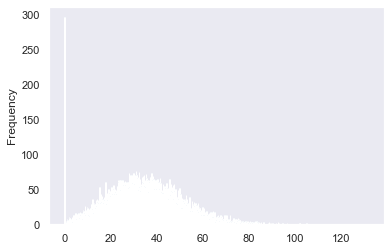

In [19]:
df.performance_score.plot.hist(bins=1000);

## Analyzing any particular team

In [61]:
def analyze_team(team_name: str, **kwargs) -> None:
    team_df = df.loc[df.own_team_name == team_name]
    if team_df.empty:
        return
    return team_df.groupby("player_name").agg({"performance_score": ["mean", "std"]})\
        .sort_values(by=("performance_score", "mean")).plot.bar(title=team_name);

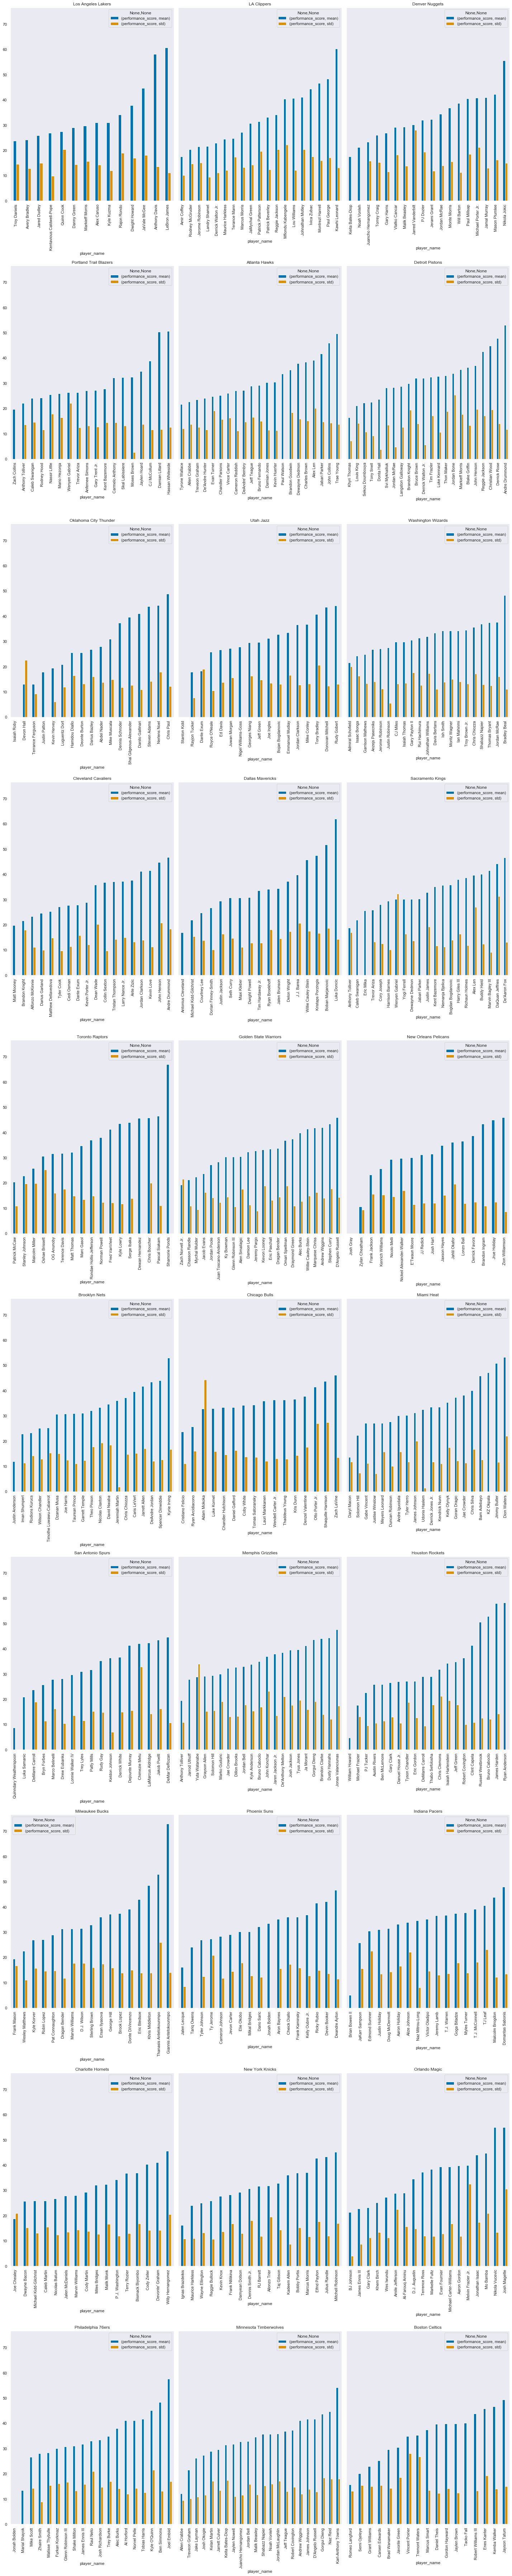

In [92]:
# analyze_team("Milwaukee Bucks")
team_names = list(df.own_team_name.unique())
fig, ax = plt.subplots(nrows=len(team_names) // 3 + len(team_names) % 3, ncols=3, sharey=True)
fig.set_figheight(100); fig.set_figwidth(20)
for idx, team in enumerate(team_names):
    plot = analyze_team(team, ax=ax, pos=idx)
    x_plot_pos, y_plot_pos = idx // 3, idx % 3
    ax[x_plot_pos, y_plot_pos] = plot

plt.tight_layout()
plt.show();